# Making data

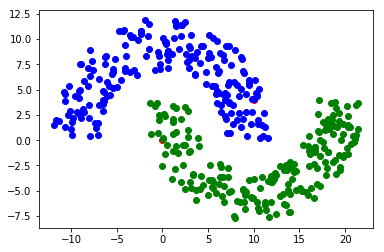

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

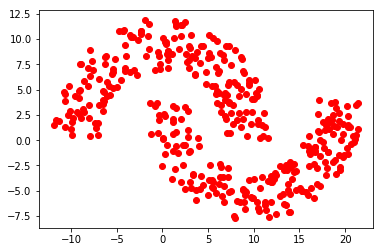

In [137]:
###### import numpy as np
import matplotlib.pyplot as plt
import math

### standard point
x = [0, 10]
y = [0, 4]

plt.plot(x,y,'ro')

### uniform rand
uni_angle = np.random.uniform(low=-0.0, high=1.0, size = 200) * (math.pi)
uni_r = np.random.uniform(low = 7, high = 12, size = 200)
uni_x = []
uni_y = []

for i in range(0,200):
    uni_x.append(uni_r[i] * math.cos(uni_angle[i]))
    uni_y.append(uni_r[i] * math.sin(uni_angle[i]))

plt.plot(uni_x, uni_y, 'bo')

### Gausian rand
# gaus_angle = np.random.normal(loc = 0.5, scale = 0.15, size = 200)* math.pi + math.pi
# gaus_r = np.random.normal(loc = 9.5, scale = 0.7, size = 200)
gaus_angle = np.random.uniform(low=-0., high=1, size = 200) * (math.pi) + math.pi
gaus_r = np.random.uniform(low = 7, high = 12, size = 200)
gaus_x = []
gaus_y = []

for i in range(0,200):
    gaus_x.append(10+gaus_r[i] * math.cos(gaus_angle[i]))
    gaus_y.append(4+gaus_r[i] * math.sin(gaus_angle[i]))

plt.plot(gaus_x,gaus_y,'go')
plt.show()

data_o = np.empty((400,2))
result = np.empty(400)

for i in range(0,200):
    data_o[i][0] = uni_x[i]
    data_o[i][1] = uni_y[i]
    data_o[i+200][0] = gaus_x[i]
    data_o[i+200][1] = gaus_y[i]
    result[i] = -1
    result[i+200] = 1

mean = data_o.mean()
data = data_o# - mean
maax = np.abs(data).max()
data = data# / maax    
# print data
print result
plt.figure(2)
plt.plot(data[:,0],data[:,1],'ro')

# training

learning_rate : 0.005
epoch : 200
0.9825
12.245157594118059
learning_rate : 0.0025
epoch : 400
1.0
0.000680319723921839
1.0
0.000471346521289525


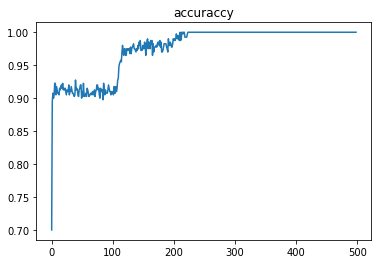

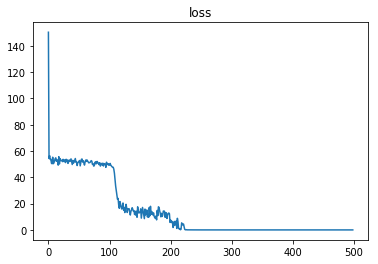

In [138]:
### weights initiation
import matplotlib.pyplot as plt

N_layer = 3
N_nodes = np.array([10,10])

# weights_input = np.random.uniform(-1,1,(data.shape[1],N_nodes[0]))
# weights_hidden = np.random.uniform(-1,1,(N_nodes[0],N_nodes[1]))
# weights_output = np.random.uniform(-1,1,(N_nodes[1],1))
# bias = np.random.randn(N_layer)

W1 = np.random.uniform(-1,1,(data.shape[1],N_nodes[0]))*0.05
W2 = np.random.uniform(-1,1,(N_nodes[0],N_nodes[1]))*0.05
W3 = np.random.uniform(-1,1,(N_nodes[1],1))*0.05

W1_new = np.ones((data.shape[1],N_nodes[0]))*0.5
W2_new = np.ones((N_nodes[0],N_nodes[1]))*0.5
W3_new = np.ones((N_nodes[1],1))*0.5

b1 = np.ones((1,N_nodes[0]))*0.05
b2 = np.ones((1,N_nodes[1]))*0.05
b3 = np.ones((1,1))*0.05

output = np.zeros((N_layer,np.max(N_nodes),len(data)))
epoch = 500
acc = []
error = []
alpha = 1
lr = 0.01



for e in range(1,epoch):
    
    if e % 200 == 0:
        lr *= 0.5
        print "learning_rate :", lr    
        print "epoch :", e
        print acc[-1]
        print error[-1]
        
        
    acc_count = 0
    error_sum = 0
    
    arr = np.arange(len(data))
    
    
    
    np.random.shuffle(arr)
    

    for n in arr:
        # Do the first Linear step 
        z1 = data[n].dot(W1) + b1

        # Put it through the first activation function
        a1 = np.tanh(z1)

        # Second linear step
        z2 = a1.dot(W2) + b2

        # Put through second activation function
        a2 = np.tanh(z2)

        #Third linear step
        z3 = a2.dot(W3) + b3
        a3 = np.tanh(z3)
        
        
        # Calculate loss derivative with respect to output
        dz3 = result[n] - a3
        
        if abs(result[n]-a3) < 1 : acc_count += 1
            
        error_sum += 0.5*dz3[0][0]**2    
        
        
        # Calculate loss derivative with respect to second layer weights
        dW3 = (a2.T).dot(dz3) #dW2 = 1/m*(a1.T).dot(dz2) 
        # Calculate loss derivative with respect to second layer bias
        db3 = np.sum(dz3, axis=0)

        # Calculate loss derivative with respect to first layer
        dz2 = np.multiply(dz3.dot(W3.T) ,1-a2**2)
        # Calculate loss derivative with respect to first layer weights
        dW2 = np.dot(a1.T, dz2)
        # Calculate loss derivative with respect to first layer bias
        db2 = np.sum(dz2, axis=0)

        dz1 = np.multiply(dz2.dot(W2.T),1-a1**2)
        dW1 = np.dot(np.array([data[n]]).T,dz1)
        db1 = np.sum(dz1,axis=0)
        
        W3 += lr*dW3
        W2 += lr*dW2
        W1 += lr*dW1
        b3 += lr*db3
        b2 += lr*db2
        b1 += lr*db1



   
    acc.append(float(acc_count)/float(len(data)))
    error.append(error_sum)
    #     print output

plt.figure(1)
plt.plot(acc)
plt.title('accuraccy')

plt.figure(2)
plt.plot(error)
plt.title('loss')

print acc[-1]
print error[-1]

# Test

In [104]:
accc = 0

for n in range(0,len(data)):
    

    ### training
    
    ## input layer
    output = data[n].dot(W1) + b1# + bias_input
    output = np.tanh(alpha*output)
    # print output
    ## hidden layer
    output = output.dot(W2) + b2# + bias_hidden
    output = np.tanh(alpha*output)
    # print output
    ## output layer
    output = output.dot(W3) + b3# + bias_output
    output = np.tanh(alpha*output)
    print n, data[n], result[n], output
    if abs(result[n]-output[0][0]) < 1: accc +=1

print accc


0 [-10.17820442   3.0773455 ] -1.0 [[-0.75940429]]
1 [-7.6108344   0.68589068] -1.0 [[0.02117404]]
2 [7.93186139 0.59732955] -1.0 [[0.55743416]]
3 [8.97887343 5.80706773] -1.0 [[-0.84955911]]
4 [6.18767953 5.30618973] -1.0 [[-0.82726395]]
5 [2.04831937 8.23865782] -1.0 [[-0.97843686]]
6 [-9.74607315  5.16738823] -1.0 [[-0.93794412]]
7 [-6.16867856  5.33328683] -1.0 [[-0.92889062]]
8 [-3.66706126  7.32374692] -1.0 [[-0.97458415]]
9 [7.96293578 5.15833724] -1.0 [[-0.78358338]]
10 [1.81319439 7.9177803 ] -1.0 [[-0.97476856]]
11 [-11.78681315   0.51725526] -1.0 [[-0.08091065]]
12 [10.4300607   0.27483886] -1.0 [[0.67199716]]
13 [-4.38107241  9.00957626] -1.0 [[-0.98910869]]
14 [-3.40135995  8.78849669] -1.0 [[-0.98746906]]
15 [4.17596105 9.50804927] -1.0 [[-0.98699591]]
16 [ 0.86662065 11.88436684] -1.0 [[-0.9951467]]
17 [6.1913032  4.48785659] -1.0 [[-0.70244472]]
18 [8.42867008 0.05552973] -1.0 [[0.67321428]]
19 [9.55247825 2.20455191] -1.0 [[0.13076268]]
20 [-4.17111567  7.87171867] -1.

359 [18.95645391 -1.25491251] 1.0 [[0.89569935]]
360 [ 8.52863504 -7.1567679 ] 1.0 [[0.97342282]]
361 [ 7.4436805  -3.39155645] 1.0 [[0.92676053]]
362 [2.62944207 1.96874598] 1.0 [[-0.05260719]]
363 [14.93355306 -2.99953845] 1.0 [[0.93630806]]
364 [ 2.25793492 -0.63686958] 1.0 [[0.67960106]]
365 [15.81089875 -0.70204852] 1.0 [[0.84646211]]
366 [-1.95356119  3.11919053] 1.0 [[-0.59043695]]
367 [16.86414339 -0.68990101] 1.0 [[0.85328835]]
368 [14.48665847 -2.49195395] 1.0 [[0.92255718]]
369 [3.56630832 0.70374693] 1.0 [[0.41270203]]
370 [ 3.76513191 -5.14278699] 1.0 [[0.95273497]]
371 [0.55307113 2.26365064] 1.0 [[-0.24247818]]
372 [17.08208319 -3.54990102] 1.0 [[0.95017059]]
373 [18.2904607  -4.61336998] 1.0 [[0.96368452]]
374 [19.14974122 -1.15546537] 1.0 [[0.8922322]]
375 [17.60979282 -2.69767504] 1.0 [[0.93591298]]
376 [14.80353561 -5.68881917] 1.0 [[0.96896727]]
377 [ 0.69230676 -2.93489944] 1.0 [[0.8839395]]
378 [17.63732337  1.65855896] 1.0 [[0.54997029]]
379 [ 4.29936295 -4.22026

# plot contour

(1076, 1766)


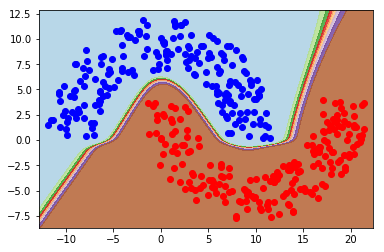

In [139]:
h = .02  # step size in the mesh
x_min, x_max = data_o[:, 0].min() - 1, data_o[:, 0].max() + 1
y_min, y_max = data_o[:, 1].min() - 1, data_o[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

data_n = np.c_[xx.ravel(),yy.ravel()]
# data_n -= mean
# data_n /= maax


## input layer
output = data_n.dot(W1) + b1# + bias_input
output = np.tanh(alpha*output)
# print output
## hidden layer
output = output.dot(W2) + b2# + bias_hidden
output = np.tanh(alpha*output)
# print output
## output layer
output = output.dot(W3) + b3# + bias_output
z = np.tanh(alpha*output)
# print output


z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)

# plt.contourf(xx, yy, z, cmap='jet', alpha=0.8)

# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.plot(uni_x, uni_y, 'bo')
plt.plot(gaus_x, gaus_y, 'ro')

print xx.shape

# plot distribution

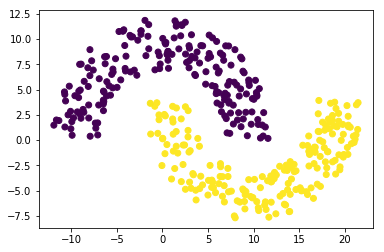

In [140]:

## input layer
output = data.dot(W1) + b1# + bias_input
output = np.tanh(alpha*output)
# print output
## hidden layer
output = output.dot(W2) + b2# + bias_hidden
output = np.tanh(alpha*output)
# print output
## output layer
output = output.dot(W3) + b3# + bias_output
z = np.tanh(alpha*output)
# print output


z = z.reshape(data_o[:,0].shape)
plt.scatter(data_o[:,0],data_o[:,1],c=z)

# plot boundary

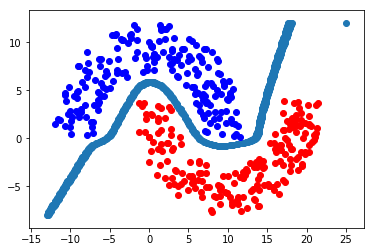

In [142]:
import matplotlib.pyplot as plt

plt.plot(uni_x, uni_y, 'bo')
plt.plot(gaus_x, gaus_y, 'ro')

x = np.linspace(-15,25,401)
y = np.linspace(-8,12,201)
data_t = np.zeros((1,2))
for i in range(0,x.shape[0]):
    for j in range(0,y.shape[0]):
        data_t = np.vstack((data_t,[x[i],y[j]])) 

# data_n = data_t-mean
# data_n = data_n/maax

# print data_t
# print data_n
boundary = np.empty((1,2))
# print boundary


## input layer
output = data_t.dot(W1) + b1# + bias_input
output = np.tanh(alpha*output)
# print output
## hidden layer
output = output.dot(W2) + b2# + bias_hidden
output = np.tanh(alpha*output)
# print output
## output layer
output = output.dot(W3) + b3# + bias_output
z = np.tanh(alpha*output)
# print output

for k in range(0,output.shape[0]):
    if abs(output[k]) < 0.2:
        boundary = np.vstack((boundary,data_t[k]))

            
            

# print boundary
# print boundary
plt.scatter(boundary[:,0],boundary[:,1])
plt.show()

            
